# Explore the data

Explore the Ebola dataset and preprocess according to the study [rstb20160308](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5394646/pdf/rstb20160308.pdf).

In [23]:
import numpy as np
import pandas as pd
import networkx as nx
import json
import os

from matplotlib import pyplot as plt
%matplotlib inline

from lib.settings import DATA_DIR

In [24]:
INPUT_FILE = os.path.join(DATA_DIR, 'ebola' , 'rstb20160308_si_001.csv')

Pick first rows of the dataset file.

In [25]:
!head -n 3 $INPUT_FILE

Load data.

In [26]:
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv(INPUT_FILE)
for col in ['DateOnset', 'DateOnsetInferred', 'DateOutcomeComp']:
    df[col] = pd.to_datetime(df[col], format="%Y-%m-%d")
                              
df.index += 2  # Set index as in Excel file row number

df.retrospective = df.retrospective.astype(bool)

print(df.shape)
df.head(15)

(33338, 16)


,Country,EpiCaseDef,FinalStatus,DateOnset,DateOnsetInferred,DateReport,DateOutcomeComp,DateHospitalCurrentAdmit,Age,CL_DistrictRes,HospitalizedEver,TreatmentCendreType,TreatmentCentre,delay.onset.hospitalisation,QuarterOnsetInferred,retrospective
2,Guinea,confirmed,Dead,2015-02-06,2015-02-06,2015-02-06,2015-02-06,NaN,45.0,FORECARIAH,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True
3,Guinea,confirmed,Dead,2015-03-02,2015-03-02,2015-03-07,2015-03-07,NaN,40.0,CONAKRY,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True
4,Guinea,confirmed,Dead,2015-03-15,2015-03-15,2015-03-17,2015-03-18,2015-03-18,0.0,FORECARIAH,Yes,ETU,Conakry 2,3.0,Jan - Mar 2015,False
5,Guinea,confirmed,Dead,2014-06-06,2014-06-06,2014-06-09,2014-06-16,2014-06-09,30.0,GUECKEDOU,Yes,ETU,Gueckedou 1,3.0,Apr - Jun 2014,False
6,Guinea,probable,Dead,2014-02-27,2014-02-27,2014-02-27,2014-03-03,NaN,46.0,GUECKEDOU,Yes,Unknown TC Type,NaN,NaN,Jan - Mar 2014,False
7,Guinea,confirmed,Alive,2015-06-26,2015-06-26,2015-06-29,2015-07-15,2015-06-30,45.0,BOKE,Yes,Hospital,Kindia 1,4.0,Apr - Jun 2015,False
8,Guinea,confirmed,Dead,2014-11-17,2014-11-17,2014-11-23,2014-11-24,NaN,13.0,N'ZEREKORE,NaN,Hospitalisation Unknown,NaN,NaN,Oct - Dec 2014,False
9,Guinea,confirmed,Alive,2014-08-29,2014-08-29,2014-08-30,2014-09-13,2014-08-29,0.0,GUECKEDOU,Yes,ETU,Gueckedou 1,0.0,Jul - Sep 2014,False
10,Guinea,confirmed,Dead,2014-08-16,2014-08-16,2014-08-18,2014-08-20,2014-08-18,72.0,MACENTA,Yes,ETU,Gueckedou 1,2.0,Jul - Sep 2014,False
11,Guinea,confirmed,Dead,2014-05-19,2014-05-19,2014-05-22,2014-05-25,2014-05-22,6.0,GUECKEDOU,Yes,ETU,Gueckedou 1,3.0,Apr - Jun 2014,False


In [27]:
df.dtypes

Country                                object
EpiCaseDef                             object
FinalStatus                            object
DateOnset                      datetime64[ns]
DateOnsetInferred              datetime64[ns]
DateReport                             object
DateOutcomeComp                datetime64[ns]
DateHospitalCurrentAdmit               object
Age                                   float64
CL_DistrictRes                         object
HospitalizedEver                       object
TreatmentCendreType                    object
TreatmentCentre                        object
delay.onset.hospitalisation           float64
QuarterOnsetInferred                   object
retrospective                            bool
dtype: object

## Basic Data Exploration

Count the number of cases per district in the raw dataset

In [28]:
df[['CL_DistrictRes', 'Country']].groupby('CL_DistrictRes').count().sort_values('Country')

,Country
CL_DistrictRes,
DINGUIRAYE,1
TOUGUE,2
MALI,5
BONTHE,6
GRAND GEDEH,8
PITA,8
DALABA,9
YOMOU,11
DABOLA,13


Make sure that the `DateOnsetInferred` only differs when `DateOnset` is missing.

In [29]:
assert df[(df.DateOnset != df.DateOnsetInferred) & ~df.DateOnset.isna()].shape[0] == 0

A few cases have an inferred onset date prior to outcome date. This will be excluded from the analysis.

In [30]:
df[~((df.DateOnsetInferred <= df.DateOutcomeComp) | df.DateOutcomeComp.isna() | df.DateOnsetInferred.isna())]

,Country,EpiCaseDef,FinalStatus,DateOnset,DateOnsetInferred,DateReport,DateOutcomeComp,DateHospitalCurrentAdmit,Age,CL_DistrictRes,HospitalizedEver,TreatmentCendreType,TreatmentCentre,delay.onset.hospitalisation,QuarterOnsetInferred,retrospective
5884,Sierra Leone,suspected,Alive,NaT,2014-11-19,2014-10-31,2014-10-21,NaN,25.0,WESTERN,Yes,Unknown TC Type,NaN,NaN,Oct - Dec 2014,True
6485,Sierra Leone,probable,Alive,NaT,2014-12-24,2014-12-05,2014-12-06,NaN,49.0,BO,Yes,Unknown TC Type,NaN,NaN,Oct - Dec 2014,False
8583,Sierra Leone,confirmed,Dead,NaT,2014-11-14,NaN,2014-09-13,NaN,50.0,WESTERN,NaN,Hospitalisation Unknown,NaN,NaN,Oct - Dec 2014,False
9147,Sierra Leone,suspected,NaN,NaT,2014-10-29,NaN,2014-10-20,NaN,NaN,WESTERN,NaN,Hospitalisation Unknown,NaN,NaN,Oct - Dec 2014,False
9465,Sierra Leone,confirmed,Dead,NaT,2014-08-12,2014-07-02,2014-06-11,NaN,35.0,KAILAHUN,Yes,Unknown TC Type,NaN,NaN,Jul - Sep 2014,True
9512,Sierra Leone,suspected,Alive,NaT,2015-03-30,2015-04-04,2015-03-04,NaN,35.0,KONO,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True
11129,Sierra Leone,suspected,Alive,NaT,2014-11-22,2014-11-22,2014-10-09,NaN,42.0,WESTERN,Yes,Unknown TC Type,NaN,NaN,Oct - Dec 2014,True
12364,Sierra Leone,suspected,Dead,NaT,2014-11-10,2014-11-12,2014-09-13,NaN,17.0,WESTERN,NaN,Hospitalisation Unknown,NaN,NaN,Oct - Dec 2014,True
15205,Sierra Leone,suspected,Dead,NaT,2015-03-08,2015-03-13,2015-03-03,NaN,7.0,KONO,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True
20351,Sierra Leone,confirmed,Dead,NaT,2014-11-14,NaN,2014-09-15,NaN,22.0,WESTERN,NaN,Hospitalisation Unknown,NaN,NaN,Oct - Dec 2014,False


Count the number of null recovery dates.

In [31]:
df.DateOutcomeComp.isna().sum()

21055

Visualize the long durations of infection.

In [32]:
df['Duration'] = df['DateOutcomeComp'] - df['DateOnsetInferred']
df.sort_values('Duration', ascending=False)

,Country,EpiCaseDef,FinalStatus,DateOnset,DateOnsetInferred,DateReport,DateOutcomeComp,DateHospitalCurrentAdmit,Age,CL_DistrictRes,HospitalizedEver,TreatmentCendreType,TreatmentCentre,delay.onset.hospitalisation,QuarterOnsetInferred,retrospective,Duration
19258,Sierra Leone,suspected,Dead,2014-05-17,2014-05-17,NaN,2015-05-15,2014-05-17,55.0,KOINADUGU,Yes,ETU,Bombali 27,0.0,Apr - Jun 2014,False,363 days
22002,Sierra Leone,suspected,Dead,2014-03-03,2014-03-03,2015-02-24,2015-02-24,NaN,0.0,WESTERN,Yes,Unknown TC Type,NaN,NaN,Jan - Mar 2014,True,358 days
9761,Sierra Leone,suspected,Alive,2014-10-29,2014-10-29,2014-11-19,2015-08-03,NaN,33.0,WESTERN,Yes,Unknown TC Type,NaN,NaN,Oct - Dec 2014,False,278 days
9778,Sierra Leone,suspected,Dead,2014-10-29,2014-10-29,2014-10-29,2015-07-30,NaN,80.0,KONO,NaN,Hospitalisation Unknown,NaN,NaN,Oct - Dec 2014,False,274 days
2227,Guinea,confirmed,Dead,2014-03-24,2014-03-24,2014-03-30,2014-12-10,2014-03-25,44.0,CONAKRY,Yes,ETU,Conakry 2,1.0,Jan - Mar 2014,False,261 days
26129,Liberia,probable,Alive,2014-03-03,2014-03-03,2014-09-06,2014-11-10,NaN,12.0,BOMI,Yes,ETU,Bomi 5,NaN,Jan - Mar 2014,False,252 days
18452,Sierra Leone,suspected,Dead,2014-07-01,2014-07-01,2015-03-10,2015-03-10,2014-07-01,75.0,WESTERN,Yes,ETU,Freetown 43,0.0,Jul - Sep 2014,True,252 days
22675,Sierra Leone,suspected,Dead,2014-04-22,2014-04-22,2014-12-01,2014-11-30,2014-04-22,45.0,KONO,Yes,Hospital,Kono 43,0.0,Apr - Jun 2014,True,222 days
14187,Sierra Leone,confirmed,Alive,2014-10-01,2014-10-01,2014-11-05,2015-05-06,2014-10-03,28.0,PORT LOKO,Yes,ETU,Port Loko 74,2.0,Oct - Dec 2014,False,217 days
17496,Sierra Leone,suspected,Alive,NaT,2014-09-19,2014-09-23,2015-04-23,2014-09-22,1.0,KONO,Yes,Unknown TC Type,Kono 33,NaN,Jul - Sep 2014,False,216 days


In [33]:
df['Duration_float'] = df['Duration'] / np.timedelta64(1, 'D')
df.loc[df.Duration_float < 0, 'Duration_float'] = np.nan
df[['Duration_float', 'FinalStatus']].groupby('FinalStatus').agg(['min', 'mean', 'median', 'std', 'max'])

Duration_float                                    
                       min       mean median        std    max
FinalStatus                                                   
Alive                  0.0  22.698677   17.0  27.982544  278.0
Dead                   0.0  10.950981    6.0  18.815632  363.0

## Data Filtering

### Rename columns

In [34]:
df_clean = df.rename(mapper={
    'Country': 'country', 
    'CL_DistrictRes': 'district', 
    'DateOnsetInferred': 'infection_date', 
    'DateOutcomeComp': 'recovery_date'
}, axis=1)

### Exclude retrospective cases from the analysis.

Number of retrospective cases.

In [35]:
df_clean.retrospective.sum()

4830

Count the number of non-retrospective cases per district.

In [36]:
df_clean['not_retrospective'] = ~df_clean['retrospective']
df_clean[['district', 'not_retrospective']].groupby('district').sum().sort_values('not_retrospective').head()

,not_retrospective
district,
DINGUIRAYE,0.0
TOUGUE,2.0
MALI,3.0
PITA,6.0
BONTHE,6.0


So the `DINGUIRAYE` will be excluded from the dataset.

In [37]:
df_clean = df_clean[~df_clean.retrospective]
df_clean.shape

(28508, 19)

### Exclude cases without a known district.

Numbe of cases without a known district to exclude.

In [38]:
df_clean.district.isna().sum()

952

In [39]:
df_clean = df_clean[~df_clean.district.isna()]
df_clean.shape

(27556, 19)

### Exclude cases with no infection date (i.e. `DateOnsetInferred`).

In [40]:
df_clean.infection_date.isna().sum()

20

In [41]:
df_clean[df_clean.infection_date.isna()]

,country,EpiCaseDef,FinalStatus,DateOnset,infection_date,DateReport,recovery_date,DateHospitalCurrentAdmit,Age,district,HospitalizedEver,TreatmentCendreType,TreatmentCentre,delay.onset.hospitalisation,QuarterOnsetInferred,retrospective,Duration,Duration_float,not_retrospective
5424,Sierra Leone,suspected,NaN,NaT,NaT,NaN,NaT,NaN,0.0,WESTERN,No,Not Hospitalised,NaN,NaN,NaN,False,NaT,NaN,True
23937,Liberia,suspected,NaN,NaT,NaT,NaN,NaT,NaN,NaN,BONG,No,Not Hospitalised,NaN,NaN,NaN,False,NaT,NaN,True
23969,Liberia,suspected,NaN,NaT,NaT,NaN,NaT,NaN,NaN,MONTSERRADO,NaN,Hospitalisation Unknown,NaN,NaN,NaN,False,NaT,NaN,True
24283,Liberia,confirmed,NaN,NaT,NaT,NaN,NaT,NaN,61.0,MONTSERRADO,NaN,Hospitalisation Unknown,NaN,NaN,NaN,False,NaT,NaN,True
24894,Liberia,suspected,NaN,NaT,NaT,NaN,NaT,NaN,9.0,MONTSERRADO,NaN,Hospitalisation Unknown,NaN,NaN,NaN,False,NaT,NaN,True
25048,Liberia,suspected,NaN,NaT,NaT,NaN,NaT,NaN,NaN,MONTSERRADO,NaN,Hospitalisation Unknown,NaN,NaN,NaN,False,NaT,NaN,True
25830,Liberia,suspected,NaN,NaT,NaT,NaN,NaT,NaN,38.0,MONTSERRADO,NaN,Hospitalisation Unknown,NaN,NaN,NaN,False,NaT,NaN,True
25839,Liberia,confirmed,NaN,NaT,NaT,NaN,NaT,NaN,36.0,MONTSERRADO,NaN,Hospitalisation Unknown,NaN,NaN,NaN,False,NaT,NaN,True
26414,Liberia,probable,NaN,NaT,NaT,NaN,NaT,NaN,28.0,NIMBA,No,Not Hospitalised,NaN,NaN,NaN,False,NaT,NaN,True
26676,Liberia,suspected,NaN,NaT,NaT,NaN,NaT,NaN,36.0,MONTSERRADO,NaN,Hospitalisation Unknown,NaN,NaN,NaN,False,NaT,NaN,True


In [42]:
df_clean = df_clean[~df_clean.infection_date.isna()]
df_clean.shape

(27536, 19)

### Filter columns.

In [43]:
df_clean = df_clean[['district', 'infection_date', 'recovery_date']]
print(df_clean.shape)
df_clean.head()

(27536, 3)


,district,infection_date,recovery_date
4,FORECARIAH,2015-03-15,2015-03-18
5,GUECKEDOU,2014-06-06,2014-06-16
6,GUECKEDOU,2014-02-27,2014-03-03
7,BOKE,2015-06-26,2015-07-15
8,N'ZEREKORE,2014-11-17,2014-11-24


### Exclude cases with bogus dates

Exclude bogus recovery dates (i.e. `DateOutcomeComp`) prior to infection dates (i.e. `DateOnsetInferred`)

In [44]:
print(df_clean[df_clean.recovery_date < df_clean.infection_date].shape)
df_clean[df_clean.recovery_date < df_clean.infection_date]

(5, 3)


,district,infection_date,recovery_date
6485,BO,2014-12-24,2014-12-06
8583,WESTERN,2014-11-14,2014-09-13
9147,WESTERN,2014-10-29,2014-10-20
20351,WESTERN,2014-11-14,2014-09-15
25570,MONTSERRADO,2014-10-02,2014-09-28


In [45]:
df_clean = df_clean[~(df_clean.recovery_date < df_clean.infection_date)]
df_clean.shape

(27531, 3)

### Normalize the district names

In [46]:
df_clean.district = df_clean.district.apply(lambda name: name.replace(' ', '_').replace("'", ""))

In [47]:
sorted(df_clean.district.unique())

['BEYLA',
 'BO',
 'BOFFA',
 'BOKE',
 'BOMBALI',
 'BOMI',
 'BONG',
 'BONTHE',
 'CONAKRY',
 'COYAH',
 'DABOLA',
 'DALABA',
 'DUBREKA',
 'FARANAH',
 'FORECARIAH',
 'FRIA',
 'GBARPOLU',
 'GRAND_BASSA',
 'GRAND_CAPE_MOUNT',
 'GRAND_GEDEH',
 'GRAND_KRU',
 'GUECKEDOU',
 'KAILAHUN',
 'KAMBIA',
 'KANKAN',
 'KENEMA',
 'KEROUANE',
 'KINDIA',
 'KISSIDOUGO',
 'KOINADUGU',
 'KONO',
 'KOUROUSSA',
 'LOFA',
 'LOLA',
 'MACENTA',
 'MALI',
 'MARGIBI',
 'MARYLAND',
 'MONTSERRADO',
 'MOYAMBA',
 'NIMBA',
 'NZEREKORE',
 'PITA',
 'PORT_LOKO',
 'PUJEHUN',
 'RIVERCESS',
 'RIVER_GEE',
 'SIGUIRI',
 'SINOE',
 'TELIMELE',
 'TONKOLILI',
 'TOUGUE',
 'WESTERN',
 'YOMOU']

Check the that the number of districts in the cleaned dataset is equal to 54 (55 districs excluding DINGUIRAYE due to retrospective cases).

In [48]:
len(df_clean.district.unique())

54

Visualize the dataset.

In [49]:
print(df_clean.shape)
df_clean.head()

(27531, 3)


,district,infection_date,recovery_date
4,FORECARIAH,2015-03-15,2015-03-18
5,GUECKEDOU,2014-06-06,2014-06-16
6,GUECKEDOU,2014-02-27,2014-03-03
7,BOKE,2015-06-26,2015-07-15
8,NZEREKORE,2014-11-17,2014-11-24


Save the cleaned dataset.

In [50]:
df_clean.to_csv(os.path.join(DATA_DIR, 'ebola', 'rstb20160308_si_001_filtered.csv'), index=False)

Delete the raw dataframe before continuing processing.

In [51]:
del df

---

## Process the data into time series for the analysis

Load the clean dataset

In [52]:
df_clean = pd.read_csv(os.path.join(DATA_DIR, 'ebola', 'rstb20160308_si_001_filtered.csv'),
                       parse_dates=['infection_date', 'recovery_date'], 
                       infer_datetime_format=True)
print(df_clean.shape)
df_clean.head()

(27531, 3)


,district,infection_date,recovery_date
0,FORECARIAH,2015-03-15,2015-03-18
1,GUECKEDOU,2014-06-06,2014-06-16
2,GUECKEDOU,2014-02-27,2014-03-03
3,BOKE,2015-06-26,2015-07-15
4,NZEREKORE,2014-11-17,2014-11-24


Number of cases with no recovery date

In [53]:
df_clean.recovery_date.isna().sum()

20196

Format the dates into timestamps in days (the extracted timestamps are initially in ns).

In [54]:
df_clean['infection_timestamp'] = df_clean.infection_date.values.astype(np.int64) / (10 ** 9 * 60 * 60 * 24)
df_clean['recovery_timestamp'] = df_clean.recovery_date.values.astype(np.int64) / (10 ** 9 * 60 * 60 * 24)
df_clean.loc[df_clean.recovery_date.isna(),'recovery_timestamp'] = np.nan

### Explore the infection duration

Compute the duration of infection period

In [55]:
df_clean['infection_duration'] = df_clean['recovery_timestamp'] - df_clean['infection_timestamp']

Visualize it

In [56]:
df_clean.sort_values('infection_duration', ascending=False)

,district,infection_date,recovery_date,infection_timestamp,recovery_timestamp,infection_duration
15746,KOINADUGU,2014-05-17,2015-05-15,16207.0,16570.0,363.0
7937,WESTERN,2014-10-29,2015-08-03,16372.0,16650.0,278.0
7950,KONO,2014-10-29,2015-07-30,16372.0,16646.0,274.0
1766,CONAKRY,2014-03-24,2014-12-10,16153.0,16414.0,261.0
21484,BOMI,2014-03-03,2014-11-10,16132.0,16384.0,252.0
11579,PORT_LOKO,2014-10-01,2015-05-06,16344.0,16561.0,217.0
14307,KONO,2014-09-19,2015-04-23,16332.0,16548.0,216.0
7416,PORT_LOKO,2014-10-05,2015-05-06,16348.0,16561.0,213.0
2900,GUECKEDOU,2014-05-19,2014-12-17,16209.0,16421.0,212.0
4001,PORT_LOKO,2014-09-04,2015-04-02,16317.0,16527.0,210.0


Show some statistics.

In [57]:
valid_duration_mask = ~df_clean.infection_duration.isna()

In [58]:
df_clean.infection_duration[valid_duration_mask].describe()

count    7335.000000
mean       18.977641
std        25.735762
min         0.000000
25%         7.000000
50%        12.000000
75%        20.000000
max       363.000000
Name: infection_duration, dtype: float64

And the median duration.

In [59]:
df_clean.infection_duration[~df_clean.infection_duration.isna()].median()

12.0

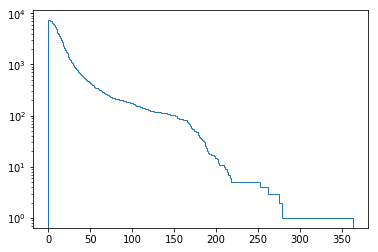

In [60]:
plt.hist(df_clean.infection_duration[~df_clean.infection_duration.isna()], 
         bins=363, density=False, histtype='step', cumulative=-1, label='Reversed emp.');
plt.yscale('log');

Since a large proportion of recovery dates are missing, and since some dates seems unreasonably long, we will ignore all recovery dates in our analysis.

In [61]:
df_clean = df_clean.drop(['recovery_date', 'recovery_timestamp', 'infection_duration'], axis=1)

---

Sort by timestamp.

In [62]:
df_clean = df_clean.sort_values('infection_timestamp')

Remove the minimum timestamp.

In [63]:
min_timestamp = df_clean.infection_timestamp.min()
df_clean.infection_timestamp -= min_timestamp

In [64]:
df_clean.reset_index()

,index,district,infection_date,infection_timestamp
0,5764,WESTERN,2013-12-26,0.0
1,13244,PUJEHUN,2013-12-26,0.0
2,18816,TONKOLILI,2014-01-01,6.0
3,11730,WESTERN,2014-01-01,6.0
4,2299,GUECKEDOU,2014-01-01,6.0
5,1200,GUECKEDOU,2014-01-01,6.0
6,1452,GUECKEDOU,2014-01-06,11.0
7,1267,GUECKEDOU,2014-01-15,20.0
8,372,GUECKEDOU,2014-01-20,25.0
9,1040,GUECKEDOU,2014-01-25,30.0


In [77]:
df_clean.infection_date.min(), df_clean.infection_date.max()

(Timestamp('2013-12-26 00:00:00'), Timestamp('2015-09-25 00:00:00'))

Save resulting dataframe.

In [65]:
df_clean.to_csv(os.path.join(DATA_DIR, 'ebola', 'rstb20160308_si_001_cleaned.csv'), index=False)

## Format clean dataframe into time series

In [72]:
df_ts = pd.DataFrame(df_clean.groupby('district').infection_timestamp.apply(list))

In [73]:
print(df_ts.shape)
display(df_ts.head())

(54, 1)


,infection_timestamp
district,
BEYLA,"[233.0, 260.0, 266.0, 273.0, 279.0, 284.0, 284..."
BO,"[176.0, 188.0, 190.0, 190.0, 191.0, 193.0, 194..."
BOFFA,"[127.0, 143.0, 144.0, 144.0, 145.0, 146.0, 147..."
BOKE,"[277.0, 496.0, 497.0, 497.0, 498.0, 513.0, 524..."
BOMBALI,"[162.0, 183.0, 194.0, 203.0, 205.0, 205.0, 207..."


In [75]:
df_ts.to_csv(os.path.join(DATA_DIR, 'ebola', 'rstb20160308_si_001_time_series.csv'), index=True)